<a href="https://colab.research.google.com/github/shreyashrestha07/CUS615_ShreyaShrestha/blob/master/Problem_set_04_LearningActivity_Explore_SVM_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Setup Notebook 
Run the code cells in this section to load the libraries and utility functions needed for this problem set. Feel free to explore the code to understand how different methods work.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn import datasets

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [45]:
def showDataPoint2D(X,y):
    X = np.array(X)
    y = np.array(y)

    c_slow_index= np.where(y==1)    #itemindex = numpy.where(array==item)
    c_fast_index= np.where(y==0)

    plt.scatter(X[c_slow_index,0],X[c_slow_index,1],  c='g', alpha=1.0, marker=r'$\clubsuit$', label="Class A")
    plt.scatter(X[c_fast_index,0],X[c_fast_index,1],  c='c', alpha=1.0, marker=r'$\clubsuit$', label="Class B")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend(loc=2)

def showDecisionBoundary2D(clf):

    x_min = -2.0; x_max = 2.0
    y_min = -2.0; y_max = 2.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)


# Learning Activity (Example)

## Generate simulated data
`sklearn` library provides several methods to generate simulated data that allow us to explore the properties of different predictive models under controlled conditions. The code below showcases some specific ways you can generate simulated data for classification problems of varying complexity. 

The code snippets generate the following dataset use-cases:
- Linearly separable classes generated from blobs.
- Linearly separable classes with some overlap.
- Non-overlapping circle dataset.
- Overlapping circle dataset.
- Non-overlapping moon-shape manifold dataset. 
- Overlapping moon-shape manifold dataset. 


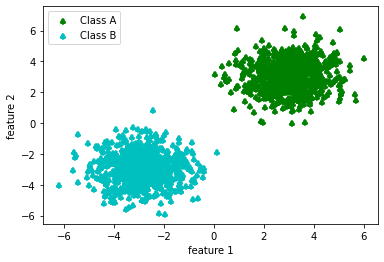

In [46]:
# Linearly seperable classes generated from blobs.
n_samples = 1500
centers = [(-3, -3), (3, 3)]
X, y = datasets.make_blobs(n_samples=n_samples, centers=centers, shuffle=False,
                  random_state=42)

showDataPoint2D(X,y)

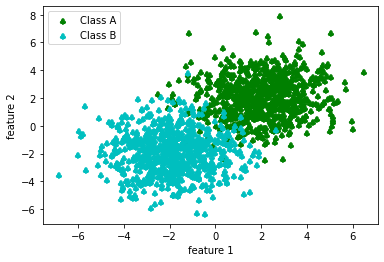

In [47]:
# Mostly linearly seperable blobs - with some class overlap 
n_samples = 1500
centers = [(-2, -2), (2, 2)]
X, y = datasets.make_blobs(n_samples=n_samples, centers=centers, shuffle=False,
                  random_state=42,cluster_std=1.5)

showDataPoint2D(X,y)

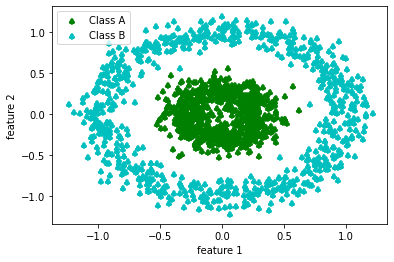

In [48]:
# Non-overlapping circle dataset 
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.35)

X, y  = datasets.make_circles(n_samples=n_samples, factor=0.3, noise=0.1)
showDataPoint2D(X,y)

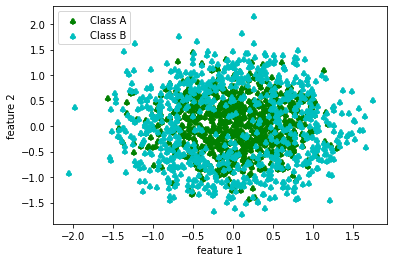

In [49]:
# Non-overlapping circle dataset 
n_samples = 1500
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.35)
showDataPoint2D(X,y)

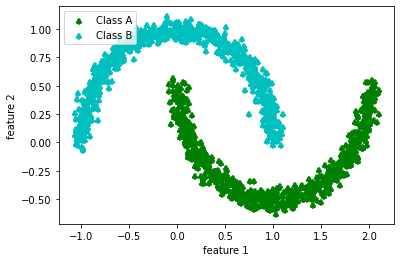

In [50]:
# Non-overlapping moon-shaped manifolds 
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples,noise=0.05, random_state=0)
#X, y = datasets.make_moons(n_samples=n_samples,noise=0.2, random_state=0)

showDataPoint2D(X,y)

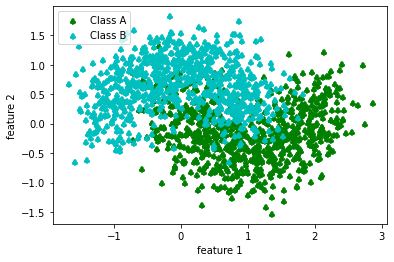

In [51]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples,noise=0.35, random_state=0)

showDataPoint2D(X,y)

## Split the Dataset into train and test set. 


In [52]:
# Split dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

## Define a Support Vector Machine
You can define a support vector machine with different parameters and explore how the decision boundary is affected. 

In [53]:

# Support Vector Machine - Kernel  
model = SVC(C=10.0, kernel="rbf", gamma=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.86      0.87      0.86       256
           1       0.86      0.85      0.85       239

    accuracy                           0.86       495
   macro avg       0.86      0.86      0.86       495
weighted avg       0.86      0.86      0.86       495



## Visualize decision boundary particition 

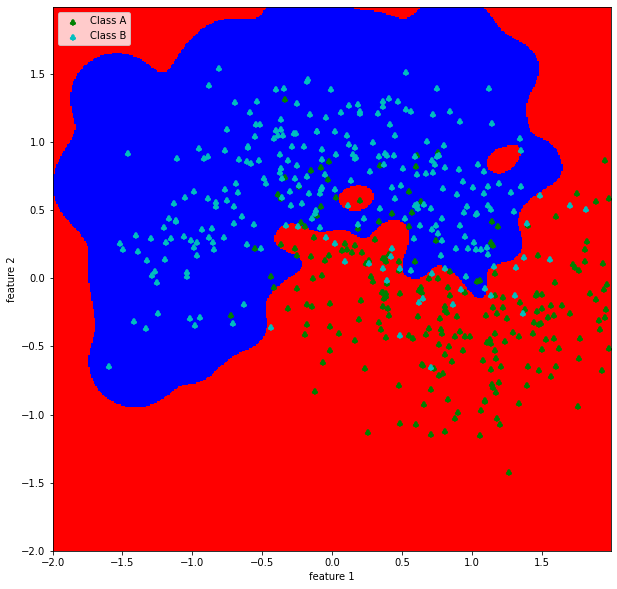

In [54]:

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints


## Learning Activity

Consider the example given above. Generate various simulated datasets of varying complexity based on the models provided. Apply the SVM classifier to make a prediction and visualize the decision boundary on each dataset and parameter configuration. 

Explore how the various parameters of the SVM classifier affect the decision boundary. Explore the impact of parameters `C`, `kernel`, and `gamma` to get an intuitive understanding of how these parameters affect the decision boundaries. Try to see how these parameters are associated with the optimization models presented during the lecture.


**1. Changing the parameter: C = 20, kerenel = rbf and gamma = 25**

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       256
           1       0.87      0.84      0.86       239

    accuracy                           0.86       495
   macro avg       0.86      0.86      0.86       495
weighted avg       0.86      0.86      0.86       495



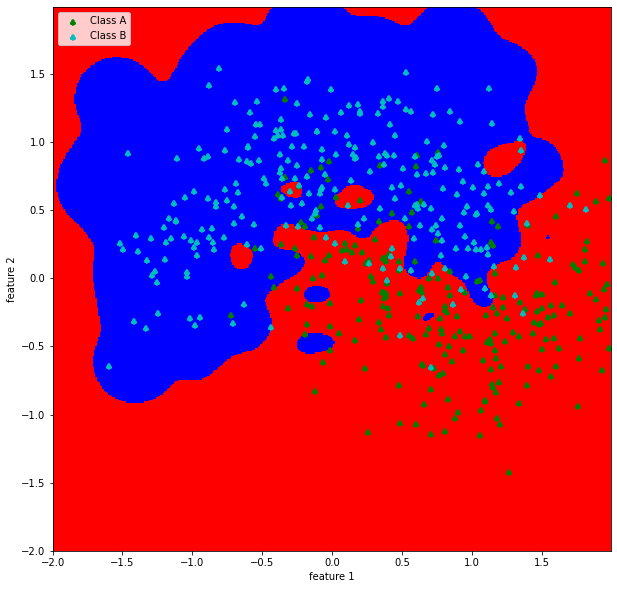

In [33]:
# Support Vector Machine - Kernel  
model = SVC(C=20, kernel="rbf", gamma=30)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints


**2. Changing the parameters: C = 20, kerenel = sigmoid and gamma = 25**

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       256
           1       0.60      0.58      0.59       239

    accuracy                           0.61       495
   macro avg       0.61      0.61      0.61       495
weighted avg       0.61      0.61      0.61       495



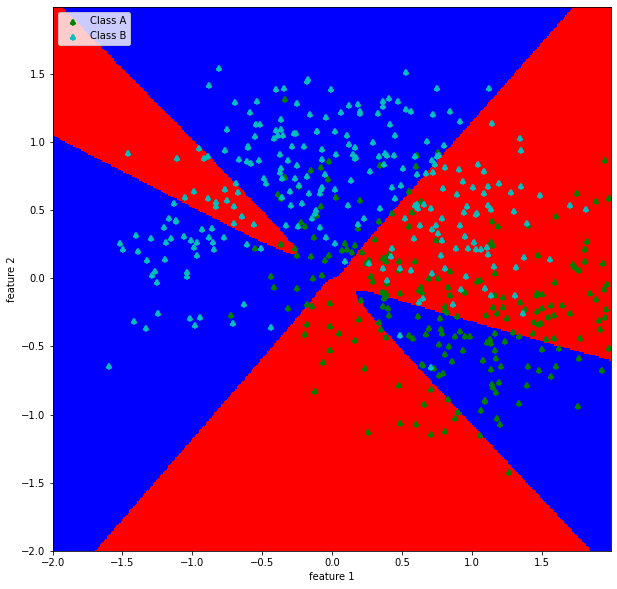

In [55]:
# Support Vector Machine - Kernel  
model = SVC(C=20, kernel="sigmoid", gamma=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

**3. Parameters: C = 5, kerenel = sigmoid and gamma = 20**

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       256
           1       0.61      0.58      0.59       239

    accuracy                           0.61       495
   macro avg       0.61      0.61      0.61       495
weighted avg       0.61      0.61      0.61       495



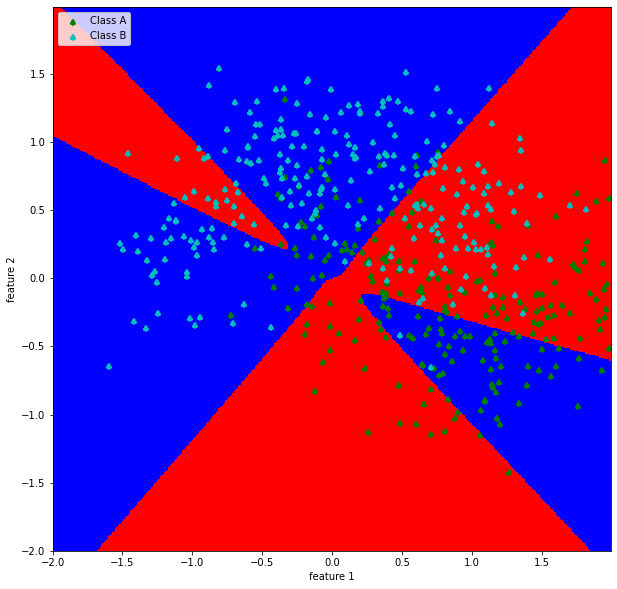

In [38]:
# Support Vector Machine - Kernel  
model = SVC(C=5, kernel="sigmoid", gamma=20)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

**Using the mostly linearly seperable blobs and using the parameters: c = 10, kernel = rbf and gamma = 25**

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       335
           1       0.94      0.92      0.93       325

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



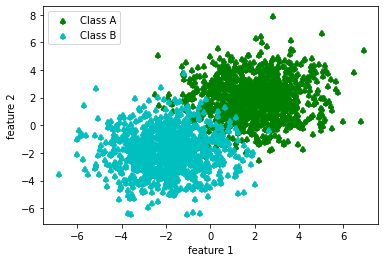

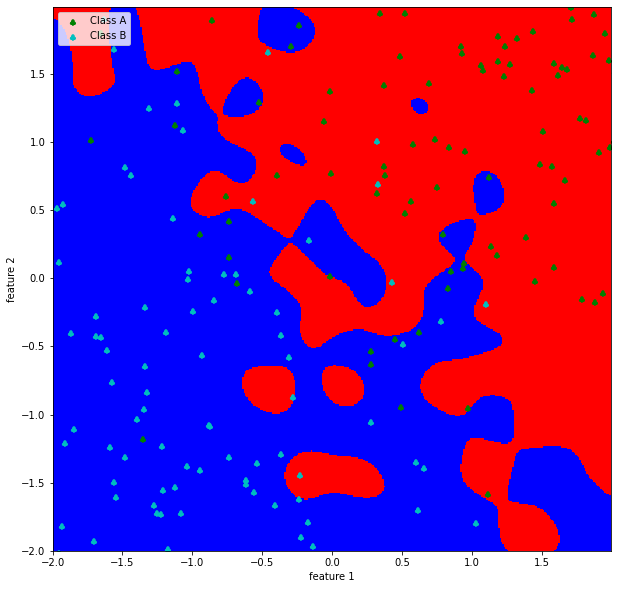

In [65]:
# Mostly linearly seperable blobs - with some class overlap 
n_samples = 2000
centers = [(-2, -2), (2, 2)]
X, y = datasets.make_blobs(n_samples=n_samples, centers=centers, shuffle=False,
                  random_state=42,cluster_std=1.5)

showDataPoint2D(X,y)

# Split dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

# Support Vector Machine - Kernel  
model = SVC(C=10, kernel="rbf", gamma=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       335
           1       0.94      0.92      0.93       325

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



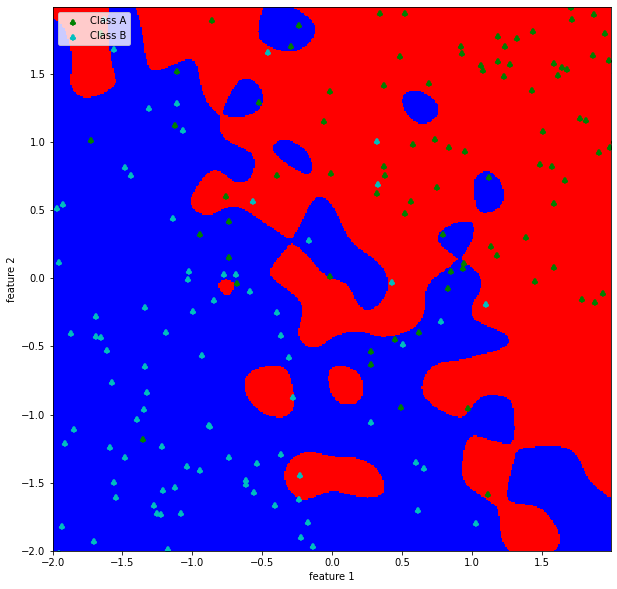

In [66]:
# Support Vector Machine - Kernel  
model = SVC(C=30, kernel="rbf", gamma=30)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       335
           1       0.95      0.91      0.93       325

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



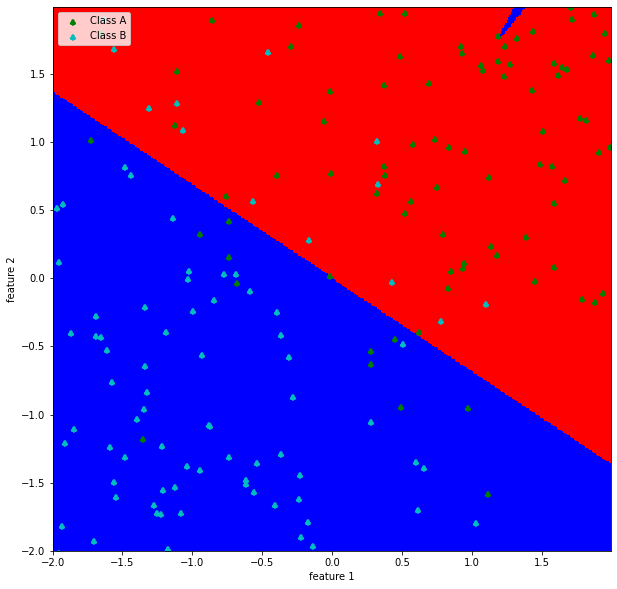

In [67]:
# Support Vector Machine - Kernel  
model = SVC(C=10, kernel="sigmoid", gamma=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       335
           1       0.95      0.90      0.92       325

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



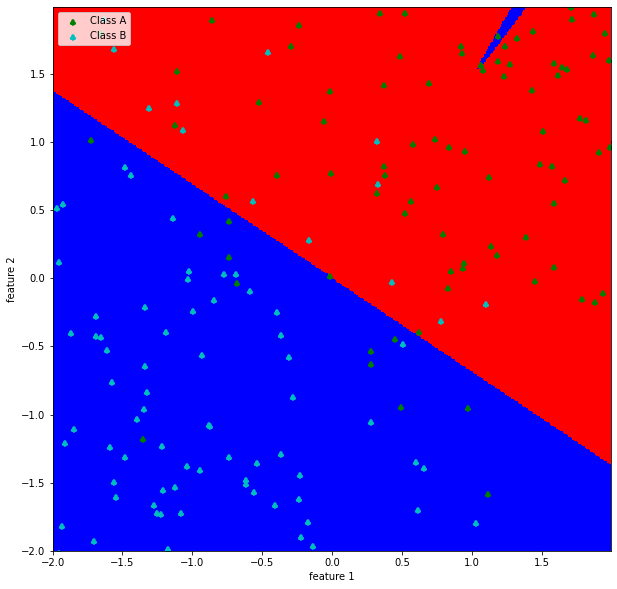

In [68]:
# Support Vector Machine - Kernel  
model = SVC(C=30, kernel="sigmoid", gamma=30)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

**Using the non-overlapping circlr dataset and using the parameters: c = 10, kernel = rbf and gamma = 25**

              precision    recall  f1-score   support

           0       0.63      0.60      0.62       245
           1       0.63      0.66      0.64       250

    accuracy                           0.63       495
   macro avg       0.63      0.63      0.63       495
weighted avg       0.63      0.63      0.63       495



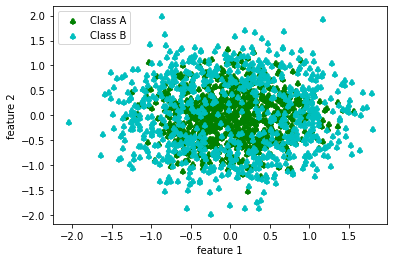

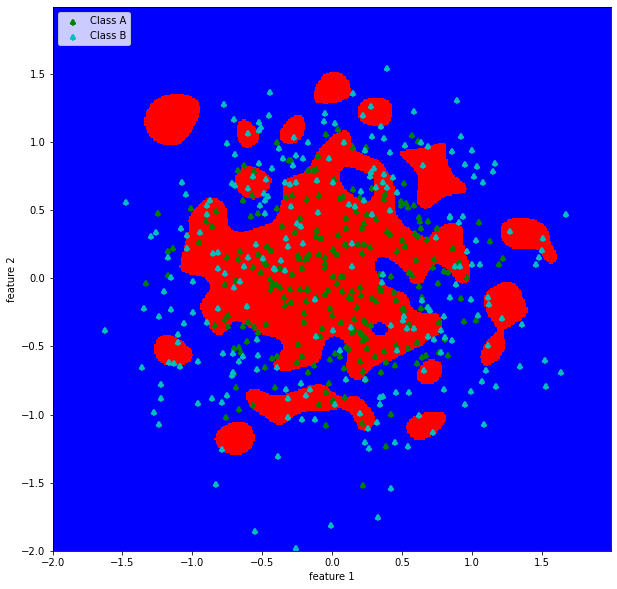

In [70]:
# Non-overlapping circle dataset 
n_samples = 1500
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.35)
showDataPoint2D(X,y)

# Split dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

# Support Vector Machine - Kernel  
model = SVC(C=30, kernel="rbf", gamma=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       245
           1       0.51      0.50      0.51       250

    accuracy                           0.51       495
   macro avg       0.51      0.51      0.51       495
weighted avg       0.51      0.51      0.51       495



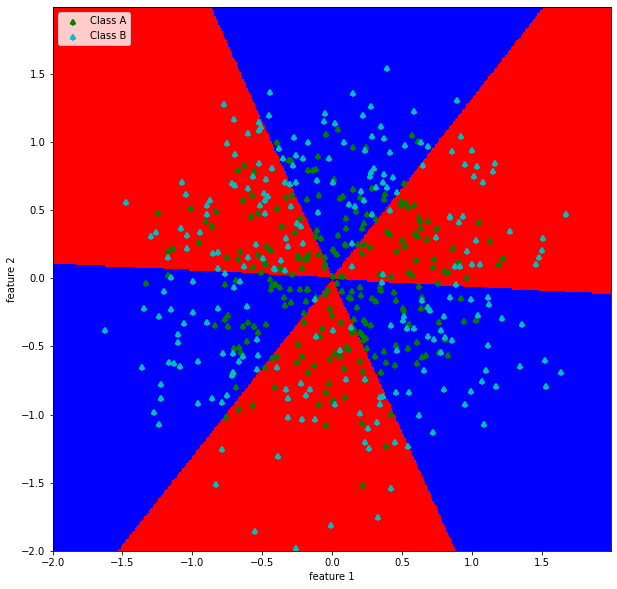

In [71]:
# Support Vector Machine - Kernel  
model = SVC(C=30, kernel="sigmoid", gamma=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

**Using the non-overplapping moon-shaped mainifolds and parameters: C = 30, kernel = rbf and gamma 25**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       1.00      1.00      1.00       239

    accuracy                           1.00       495
   macro avg       1.00      1.00      1.00       495
weighted avg       1.00      1.00      1.00       495



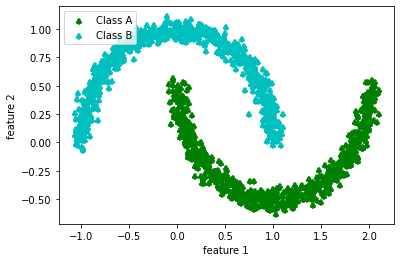

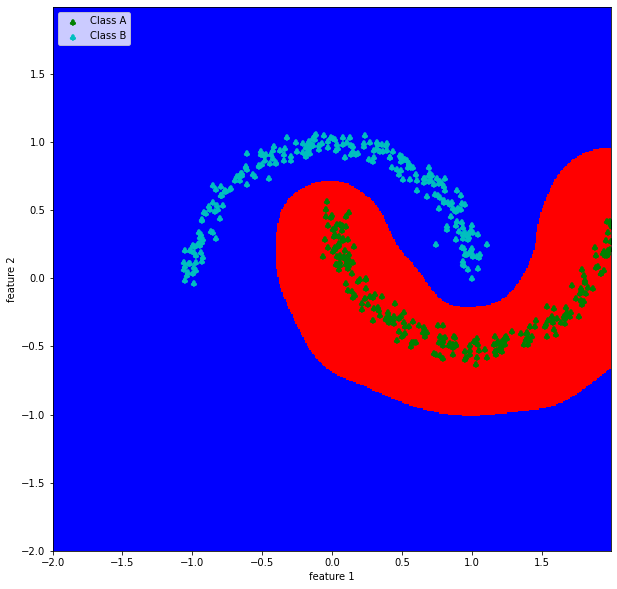

In [72]:
# Non-overlapping moon-shaped manifolds 
n_samples = 3000
X, y = datasets.make_moons(n_samples=n_samples,noise=0.05, random_state=0)
#X, y = datasets.make_moons(n_samples=n_samples,noise=0.2, random_state=0)

showDataPoint2D(X,y)

# Split dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

# Support Vector Machine - Kernel  
model = SVC(C=30, kernel="rbf", gamma=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       256
           1       0.52      0.46      0.49       239

    accuracy                           0.53       495
   macro avg       0.53      0.53      0.53       495
weighted avg       0.53      0.53      0.53       495



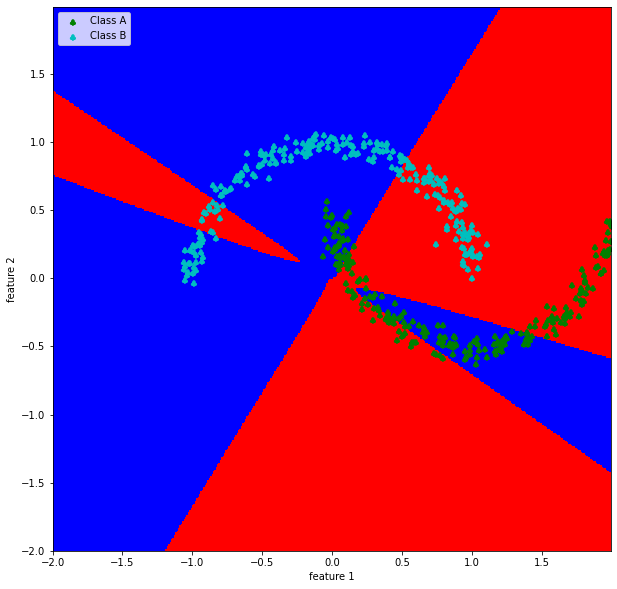

In [74]:
# Support Vector Machine - Kernel  
model = SVC(C=50, kernel="sigmoid", gamma=45)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

**Using Non overlapping circle data and parameters: c = 20, kernel = rbf and gamma = 35**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00       330

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



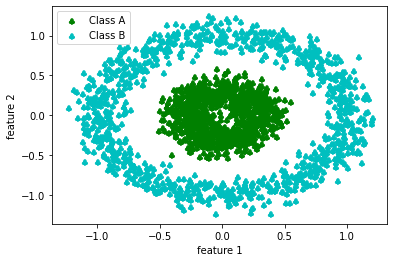

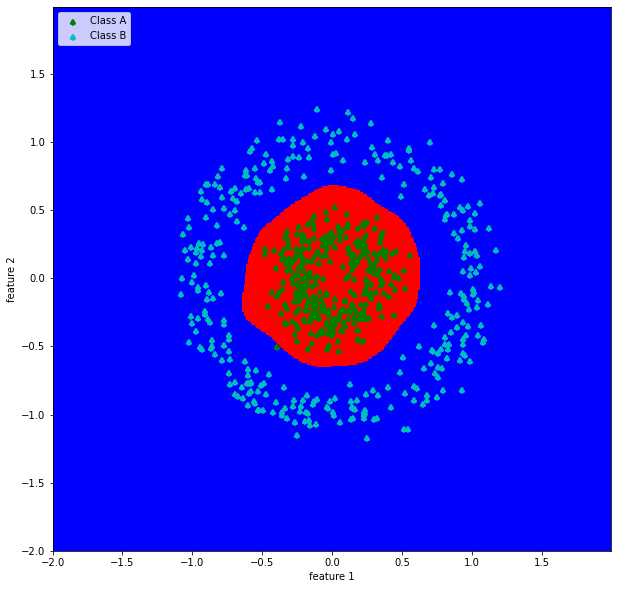

In [75]:
# Non-overlapping circle dataset 
n_samples = 2000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.35)

X, y  = datasets.make_circles(n_samples=n_samples, factor=0.3, noise=0.1)
showDataPoint2D(X,y)

# Split dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

# Support Vector Machine - Kernel  
model = SVC(C=20, kernel="rbf", gamma=35)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

              precision    recall  f1-score   support

           0       0.49      0.54      0.52       330
           1       0.49      0.44      0.46       330

    accuracy                           0.49       660
   macro avg       0.49      0.49      0.49       660
weighted avg       0.49      0.49      0.49       660



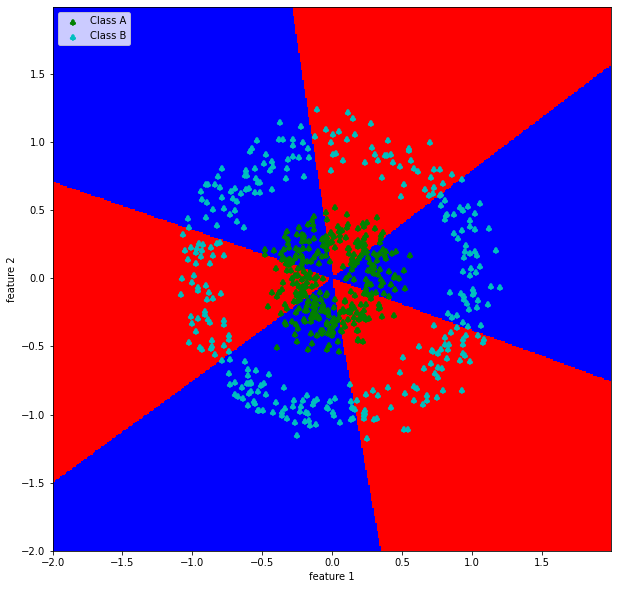

In [76]:
# Support Vector Machine - Kernel  
model = SVC(C=20, kernel="sigmoid", gamma=35)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#report classificaiton results 
print(classification_report(y_test,y_pred)) 

# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 
showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.